In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_data.csv", low_memory=False)
test_data = pd.read_csv("test_data.csv")

In [3]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
test_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [5]:
# Drop columns that are not present in the test dataset
train_data.drop(columns=["WCB Decision", "Agreement Reached"], inplace=True)

In [6]:
# Check for missing values (n = number of missing values & % = percentage of missing values)
pd.DataFrame({
    "n NAs | Train": train_data.isnull().sum(),
    "% NAs | Train": round(train_data.isnull().mean() * 100, 2),
    "n NAs | Test": test_data.isnull().sum(),
    "% NAs | Test": round(test_data.isnull().mean() * 100, 2)}
)

,n NAs | Train,% NAs | Train,n NAs | Test,% NAs | Test
Accident Date,23134,3.90,2444.0,0.63
Age at Injury,19445,3.28,0.0,0.00
Alternative Dispute Resolution,19445,3.28,0.0,0.00
Assembly Date,0,0.00,0.0,0.00
Attorney/Representative,19445,3.28,0.0,0.00
Average Weekly Wage,48096,8.10,19204.0,4.95
Birth Year,48523,8.18,19470.0,5.02
C-2 Date,34005,5.73,9134.0,2.35
C-3 Date,406226,68.45,302759.0,78.04
COVID-19 Indicator,19445,3.28,0.0,0.00


# Individual feature analysis
- `Attorney/Representative` (Is the claim being represented by an Attorney?)
- `Average Weekly Wage` (The wage used to calculate workers' compensation, disability, or Paid Leave wage replacement benefits.)
- `COVID-19 Indicator` (Indication that the claim may be associated with COVID-19.)
- `Gender` (The reported gender of the injured worker.)
- `IME-4 Count` (Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination" form.)

Attorney/Representative: 19445 (3.28%) NAs in Train, 0 NAs in Test  <br>
Average Weekly Wage: 48096 (8.10%) NAs in Train, 19204 (4.95%) NAs in Test	<br>
Covid-19 Indicator: 19445(3.28%) NAs in Train, 0 NAs in Test <br>
Gender: 19445 (3.28%) NAs in Train, 0 NAs in Test <br>
**IME-4 Count: 460668 (77.62%) NAs in Train, 352726.0 (90.91%) NAs in Test** <br>

In [7]:
train_data[['Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'Gender', 'IME-4 Count']]

,Attorney/Representative,Average Weekly Wage,COVID-19 Indicator,Gender,IME-4 Count
0,N,0.00,N,M,NaN
1,Y,1745.93,N,F,4.0
2,N,1434.80,N,M,NaN
3,NaN,NaN,NaN,NaN,NaN
4,N,NaN,N,M,NaN
...,...,...,...,...,...
593466,NaN,NaN,NaN,NaN,NaN
593467,N,0.00,N,F,NaN
593468,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,NaN,NaN


In [8]:
train_data[['Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'Gender', 'IME-4 Count']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Attorney/Representative  574026 non-null  object 
 1   Average Weekly Wage      545375 non-null  float64
 2   COVID-19 Indicator       574026 non-null  object 
 3   Gender                   574026 non-null  object 
 4   IME-4 Count              132803 non-null  float64
dtypes: float64(2), object(3)
memory usage: 22.6+ MB


## Handling data type

In [9]:
pd.DataFrame(train_data[['Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'Gender', 'IME-4 Count']].dtypes).rename(columns={0: 'Data type'})

,Data type
Attorney/Representative,object
Average Weekly Wage,float64
COVID-19 Indicator,object
Gender,object
IME-4 Count,float64


In [10]:
pd.DataFrame(test_data[['Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'Gender', 'IME-4 Count']].dtypes).rename(columns={0: 'Data type'})

,Data type
Attorney/Representative,object
Average Weekly Wage,float64
COVID-19 Indicator,object
Gender,object
IME-4 Count,float64


Good data types for `Average Weekly Wage`, `Gender` <br>
Wrong data types for `Attorney/Representative`, `COVID-19 Indicator`, `IME-4 Count` <br>
Need to change:

- `Attorney/Representative` - boolean,
- `COVID-19 Indicator` - boolean,
- `IME-4 Count` - integer

In [11]:
print(train_data['COVID-19 Indicator'].unique(), test_data['COVID-19 Indicator'].unique())

['N' nan 'Y'] ['N' 'Y']


In [12]:
print(train_data['Attorney/Representative'].unique(), test_data['Attorney/Representative'].unique())

['N' 'Y' nan] ['N' 'Y']


In [13]:
print(train_data['Gender'].unique(), test_data['Gender'].unique())

['M' 'F' nan 'U' 'X'] ['M' 'F' 'U' 'X']


`Attorney/Representative` and `COVID-19 Indicator` have only 2 unique values (+ NaN in `train_data`) <br>
Note that there are 4 different categories for `Gender` + NaN. Need to merge `U` and NaN together. It'll leave us with 3 categories - M, F, and X

In [14]:
# Converting NaNs to U (Unknown) in 'Gender'
train_data['Gender'] = train_data['Gender'].replace(np.nan, 'U')
test_data['Gender'] = test_data['Gender'].replace(np.nan, 'U')

In [15]:
# Converting 'Y' to True and 'N' to False in 'Attorney/Representative' and 'COVID-19 Indicator'
train_data.replace({'Attorney/Representative': {'Y': True, 'N': False}, 
                    'COVID-19 Indicator': {'Y': True, 'N': False}}, inplace=True)
test_data.replace({'Attorney/Representative': {'Y': True, 'N': False}, 
                    'COVID-19 Indicator': {'Y': True, 'N': False}}, inplace=True)

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_7364/1814373196.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'Attorney/Representative': {'Y': True, 'N': False},


In [16]:
###decided not to do it since the NAs values make the visualization of bool harder###
# converting to "boolean" over "bool" allows preservation of NaNs
#train_data['Attorney/Representative'] = train_data['Attorney/Representative'].astype("boolean")
#train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].astype("boolean")

#test_data['Attorney/Representative'] = test_data['Attorney/Representative'].astype("boolean")
#test_data['COVID-19 Indicator'] = test_data['COVID-19 Indicator'].astype("boolean")

In [17]:
# Converting IME-4 Count to int
train_data['IME-4 Count'] = train_data['IME-4 Count'].astype('Int64')
test_data['IME-4 Count'] = test_data['IME-4 Count'].astype('Int64')

In [18]:
pd.DataFrame(train_data[['Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'Gender', 'IME-4 Count']].dtypes).rename(columns={0: 'Data type'})

,Data type
Attorney/Representative,object
Average Weekly Wage,float64
COVID-19 Indicator,object
Gender,object
IME-4 Count,Int64


In [19]:
pd.DataFrame(test_data[['Attorney/Representative', 'Average Weekly Wage', 'COVID-19 Indicator', 'Gender', 'IME-4 Count']].dtypes).rename(columns={0: 'Data type'})

,Data type
Attorney/Representative,bool
Average Weekly Wage,float64
COVID-19 Indicator,bool
Gender,object
IME-4 Count,Int64


UPDATED: <br>
- Good data types for `Average Weekly Wage`, `Gender`, `IME-4 Count`, `Attorney/Representative`, `COVID-19 Indicator` 

## Strange Values Check

As noted above:
- no abnormalities in `Attorney/Representative` and `COVID-19 Indicator`<br>

Need to check `Average Weekly Wage` and `IME-4 Count`

In [20]:
train_data[['Average Weekly Wage', 'IME-4 Count']].describe().T

,count,mean,std,min,25%,50%,75%,max
Average Weekly Wage,545375.0,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0


- Plenty of 0s in `Average Weekly Wage`
- Top value in `Average Weekly Wage` is very unlikely - weekly income of 2 828 079
- 73 forms per single claim in `IME-4 Count`

In [21]:
# How many cases have crazy big income
(train_data['Average Weekly Wage'] > 100_000).sum()

16

In [22]:
train_data['Average Weekly Wage'].count()

545375

In [23]:
print(f'{(train_data['Average Weekly Wage'] == 0).sum()} ({(train_data['Average Weekly Wage'] == 0).sum()/train_data['Average Weekly Wage'].count()*100}%) people have no weekly income.')

335450 (61.508136603254634%) people have no weekly income.


In [24]:
test_data[['Average Weekly Wage', 'IME-4 Count']].describe().T

,count,mean,std,min,25%,50%,75%,max
Average Weekly Wage,368771.0,183.343831,3542.310214,0.0,0.0,0.0,0.0,1950317.0
IME-4 Count,35249.0,2.118131,1.465406,1.0,1.0,2.0,2.0,18.0


- Genuine 0s or missing values in `Average Weekly Wage`?<br>
- Note that there is even larger proportion of 0s in `test_data`

# Average Weekly Wage and IME-4 Count
Very ugly graphs since there is unproportianally many 0s or 1s in `Average Weekly Wage` and `IME-4 Count`

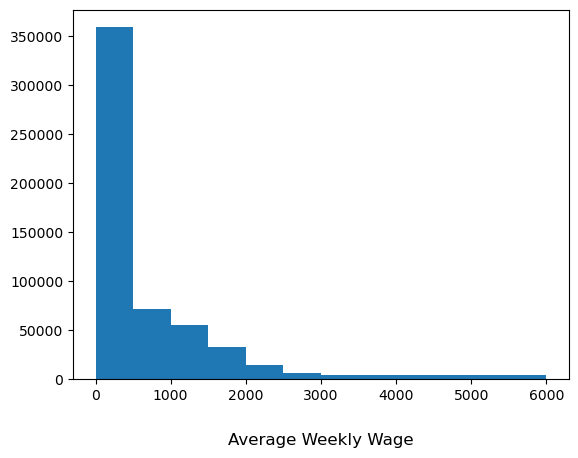

In [25]:
bins = (0, 500, 1000, 1500, 2000, 2500, 3000, 6000)

plt.hist(train_data['Average Weekly Wage'], bins=bins)  
plt.title('Average Weekly Wage', y=-.2)

plt.show()

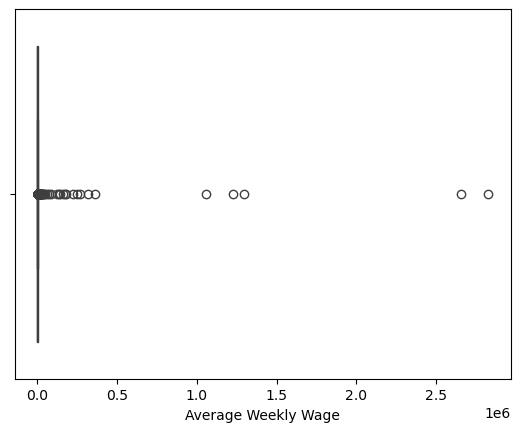

In [26]:
sns.boxplot(x=train_data['Average Weekly Wage'])

plt.show()

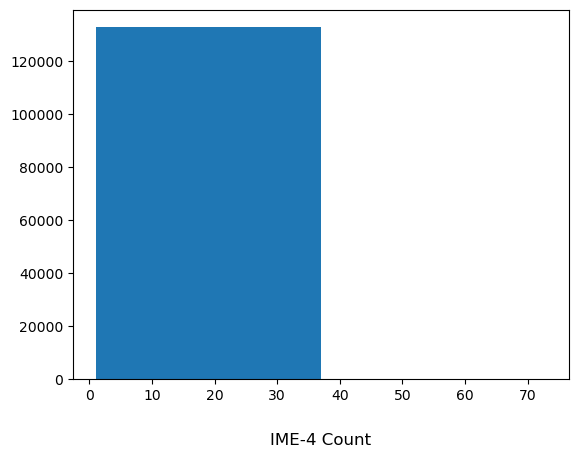

In [27]:
# Single Metric Variable Histogram
plt.hist(train_data['IME-4 Count'], bins=2)  # mess around with the bins
plt.title('IME-4 Count', y=-0.2)

plt.show()

# Gender

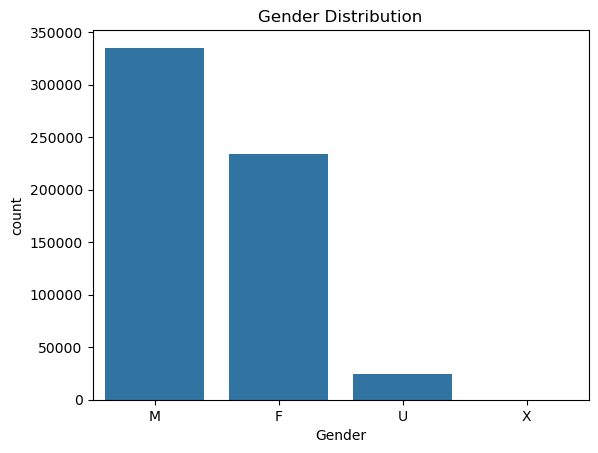

In [28]:
sns.countplot(x='Gender', data=train_data)

# Set the title
plt.title('Gender Distribution')

# Show the plot
plt.show()

In [29]:
train_data['Gender'].value_counts()

Gender
M    335218
F    234051
U     24156
X        46
Name: count, dtype: int64

In [30]:
test_data['Gender'].value_counts()

Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64

# COVID-19 Indicator

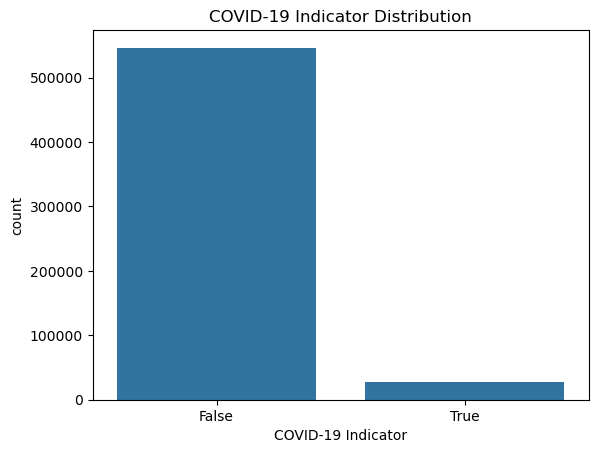

In [31]:
sns.countplot(x='COVID-19 Indicator', data=train_data)

# Set the title
plt.title('COVID-19 Indicator Distribution')

# Show the plot
plt.show()

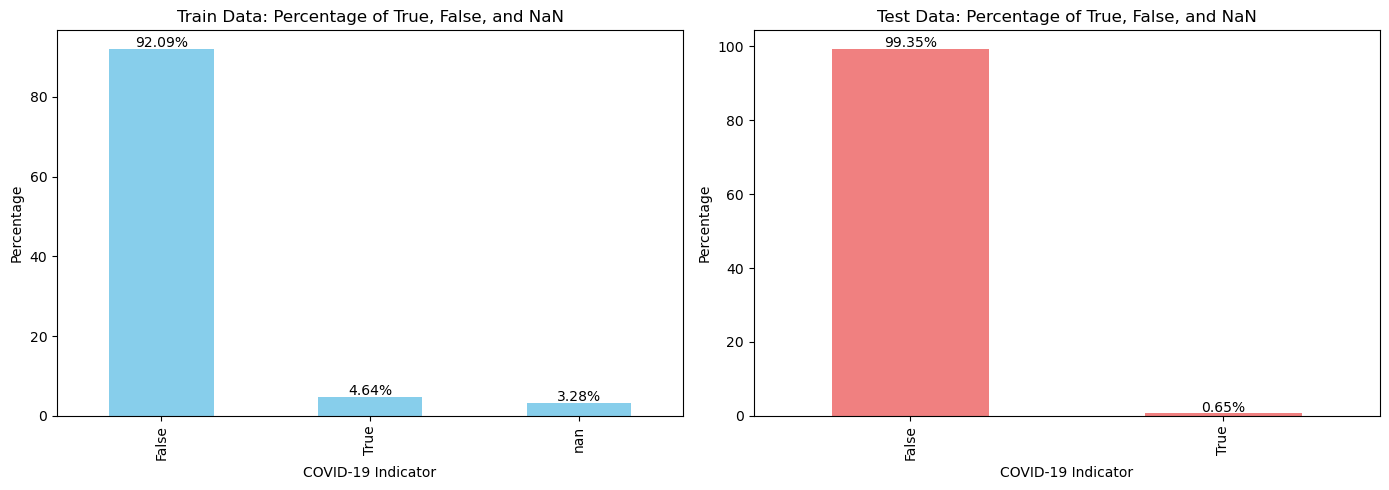

In [32]:
# Assuming train_data and test_data DataFrames are already defined and contain the 'Attorney/Representative' column

# Calculate the percentage of each category (True, False, and NaN) for train_data
train_covid_counts = train_data['COVID-19 Indicator'].value_counts(dropna=False)
train_covid_percentage = (train_covid_counts / len(train_data['COVID-19 Indicator'])) * 100

# Calculate the percentage of each category (True, False, and NaN) for test_data
test_covid_counts = test_data['COVID-19 Indicator'].value_counts(dropna=False)
test_covid_percentage = (test_covid_counts / len(test_data['COVID-19 Indicator'])) * 100

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for train_data
train_covid_percentage.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Train Data: Percentage of True, False, and NaN')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('COVID-19 Indicator')

# Annotate the bars for train_data
for i, percentage in enumerate(train_covid_percentage):
    axes[0].text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

# Plot for test_data
test_covid_percentage.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Test Data: Percentage of True, False, and NaN')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('COVID-19 Indicator')

# Annotate the bars for test_data
for i, percentage in enumerate(test_covid_percentage):
    axes[1].text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Attorney/Representative 

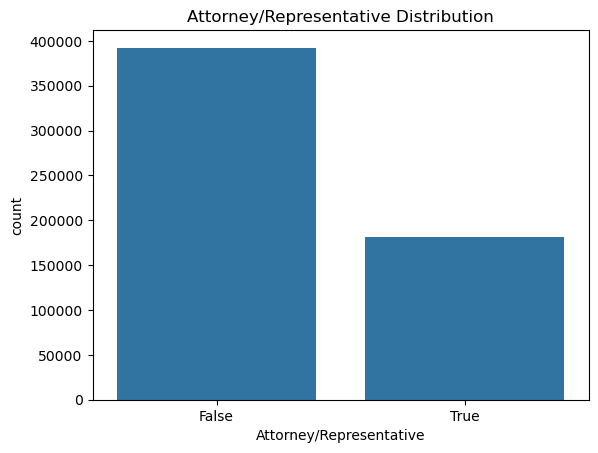

In [33]:
sns.countplot(x='Attorney/Representative', data=train_data)

# Set the title
plt.title('Attorney/Representative Distribution')

# Show the plot
plt.show()

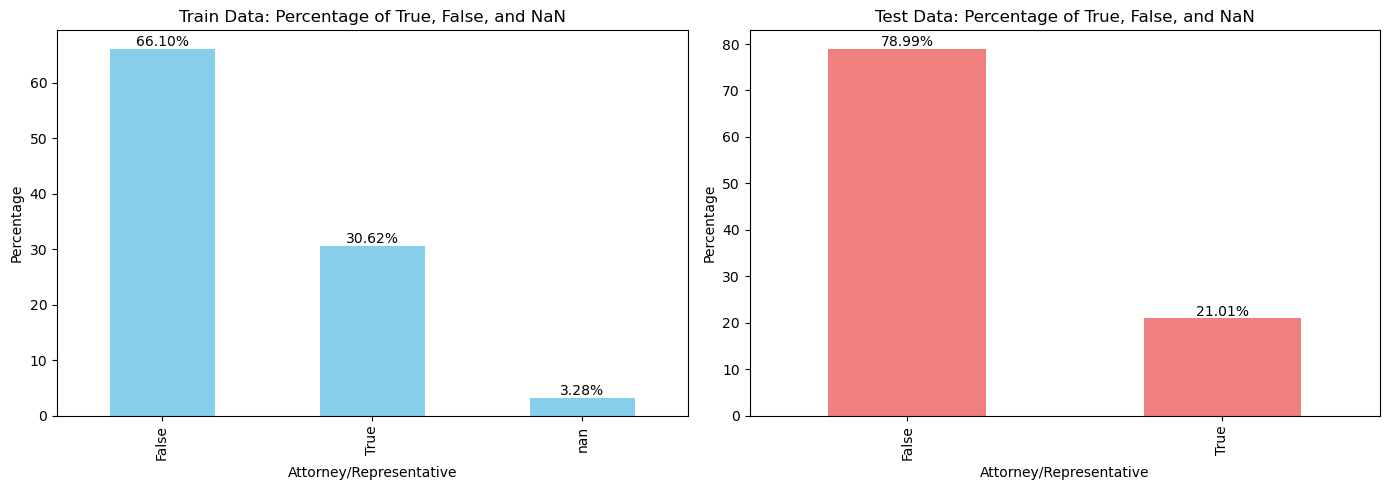

In [34]:
# Calculate the percentage of each category (True, False, and NaN) for train_data
train_attorney_rep_counts = train_data['Attorney/Representative'].value_counts(dropna=False)
train_attorney_rep_percentage = (train_attorney_rep_counts / len(train_data)) * 100

# Calculate the percentage of each category (True, False, and NaN) for test_data
test_attorney_rep_counts = test_data['Attorney/Representative'].value_counts(dropna=False)
test_attorney_rep_percentage = (test_attorney_rep_counts / len(test_data)) * 100

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for train_data
train_attorney_rep_percentage.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Train Data: Percentage of True, False, and NaN')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Attorney/Representative')

# Annotate the bars for train_data
for i, percentage in enumerate(train_attorney_rep_percentage):
    axes[0].text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

# Plot for test_data
test_attorney_rep_percentage.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Test Data: Percentage of True, False, and NaN')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Attorney/Representative')

# Annotate the bars for test_data
for i, percentage in enumerate(test_attorney_rep_percentage):
    axes[1].text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Correlation

In [35]:
metric_features = train_data[['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code',
                              'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']]

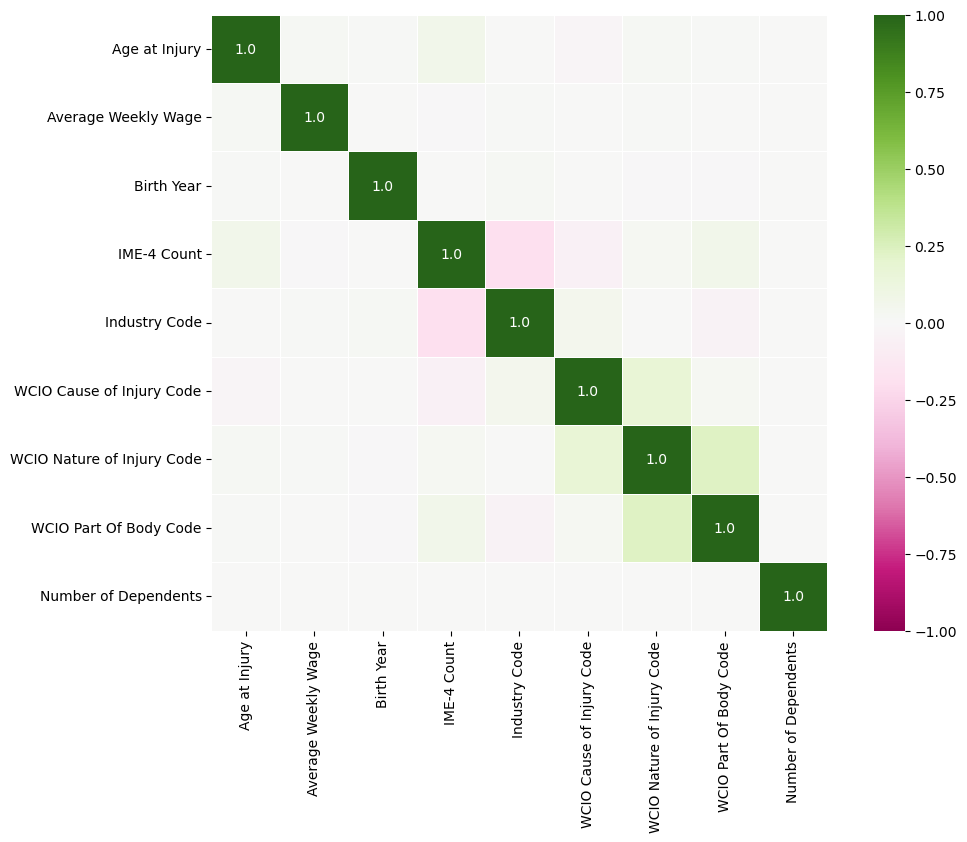

In [36]:
corr = metric_features.corr(method="pearson").round(2)

mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 
fig = plt.figure(figsize=(12, 8))

sns.heatmap(data=corr, 
            annot=annot,
            fmt='s', 
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG'
    
           )

plt.show()

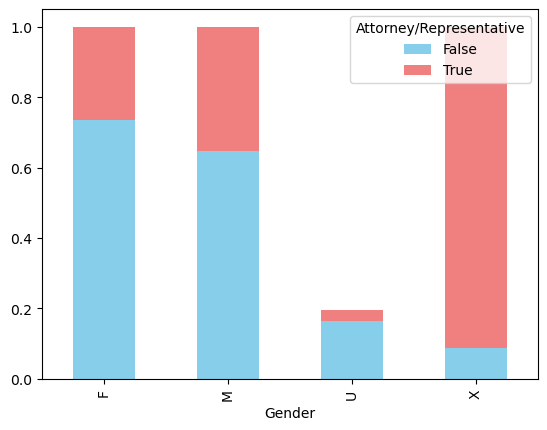

In [37]:
cat1 = 'Gender'
cat2 = 'Attorney/Representative'

catpc_df = train_data.groupby([cat1, cat2])[cat2].size() / train_data.groupby([cat1])[cat2].size() 

catpc_df.unstack().plot.bar(color=('skyblue','lightcoral'), stacked=True)


plt.show()

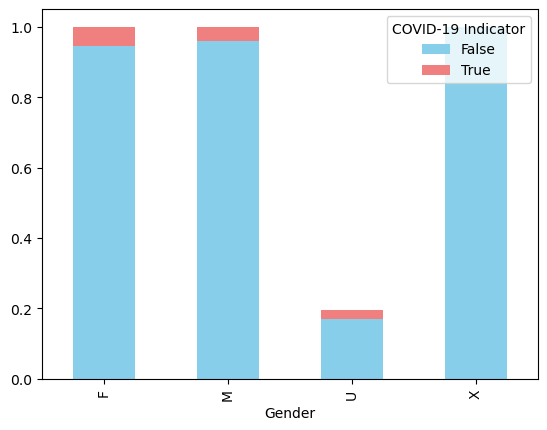

In [38]:
cat1 = 'Gender'
cat2 = 'COVID-19 Indicator'

catpc_df = train_data.groupby([cat1, cat2])[cat2].size() / train_data.groupby([cat1])[cat2].size() 

catpc_df.unstack().plot.bar(color=('skyblue','lightcoral') ,stacked=True)


plt.show()

# Key Notes
- According to Cramer's V correlation matrix `COVID-19 Indicator` highly correlates with `WCIO Cause of Injury Description` (0.85) and `WCIO Nature of Injury Description` (0.86) and has a correlation higher than 0.7 with 11 other categorical featurse. Moreover, it's outcome values are highly unbalanced. Is it a redundant feature?
- For many variables the same % of NAs appear.  I.e., 12 variables in Test have 3.28% of NAs. Need to delete these rows?
- 61.5% of `train_data` has 0 of `Average Weekly Wage`. I didn't touch it because I suspect plenty of these 0s are genuine. These values are also missing for `test_data`. Also, some values on the other side of the spectrum. With so many ambiguos values , in my opinion, this feature might be a candidate for removal.